In [19]:
import math
import numpy as np
import scipy
from matplotlib import *
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [20]:
data = pd.read_csv('./Personal-Projects/GSPC.csv')

In [21]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1950-01-03,16.66,16.66,16.66,16.66,16.66,1260000
1,1950-01-04,16.85,16.85,16.85,16.85,16.85,1890000
2,1950-01-05,16.93,16.93,16.93,16.93,16.93,2550000
3,1950-01-06,16.98,16.98,16.98,16.98,16.98,2010000
4,1950-01-09,17.08,17.08,17.08,17.08,17.08,2520000


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17218 entries, 0 to 17217
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       17218 non-null  object 
 1   Open       17218 non-null  float64
 2   High       17218 non-null  float64
 3   Low        17218 non-null  float64
 4   Close      17218 non-null  float64
 5   Adj Close  17218 non-null  float64
 6   Volume     17218 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 941.7+ KB


In [23]:
# Convert the 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

In [24]:
# modify dateframe directly
data.sort_values("Date", inplace=True)
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1950-01-03,16.66,16.66,16.66,16.66,16.66,1260000
1,1950-01-04,16.85,16.85,16.85,16.85,16.85,1890000
2,1950-01-05,16.93,16.93,16.93,16.93,16.93,2550000
3,1950-01-06,16.98,16.98,16.98,16.98,16.98,2010000
4,1950-01-09,17.08,17.08,17.08,17.08,17.08,2520000


Text(0, 0.5, 'Price')

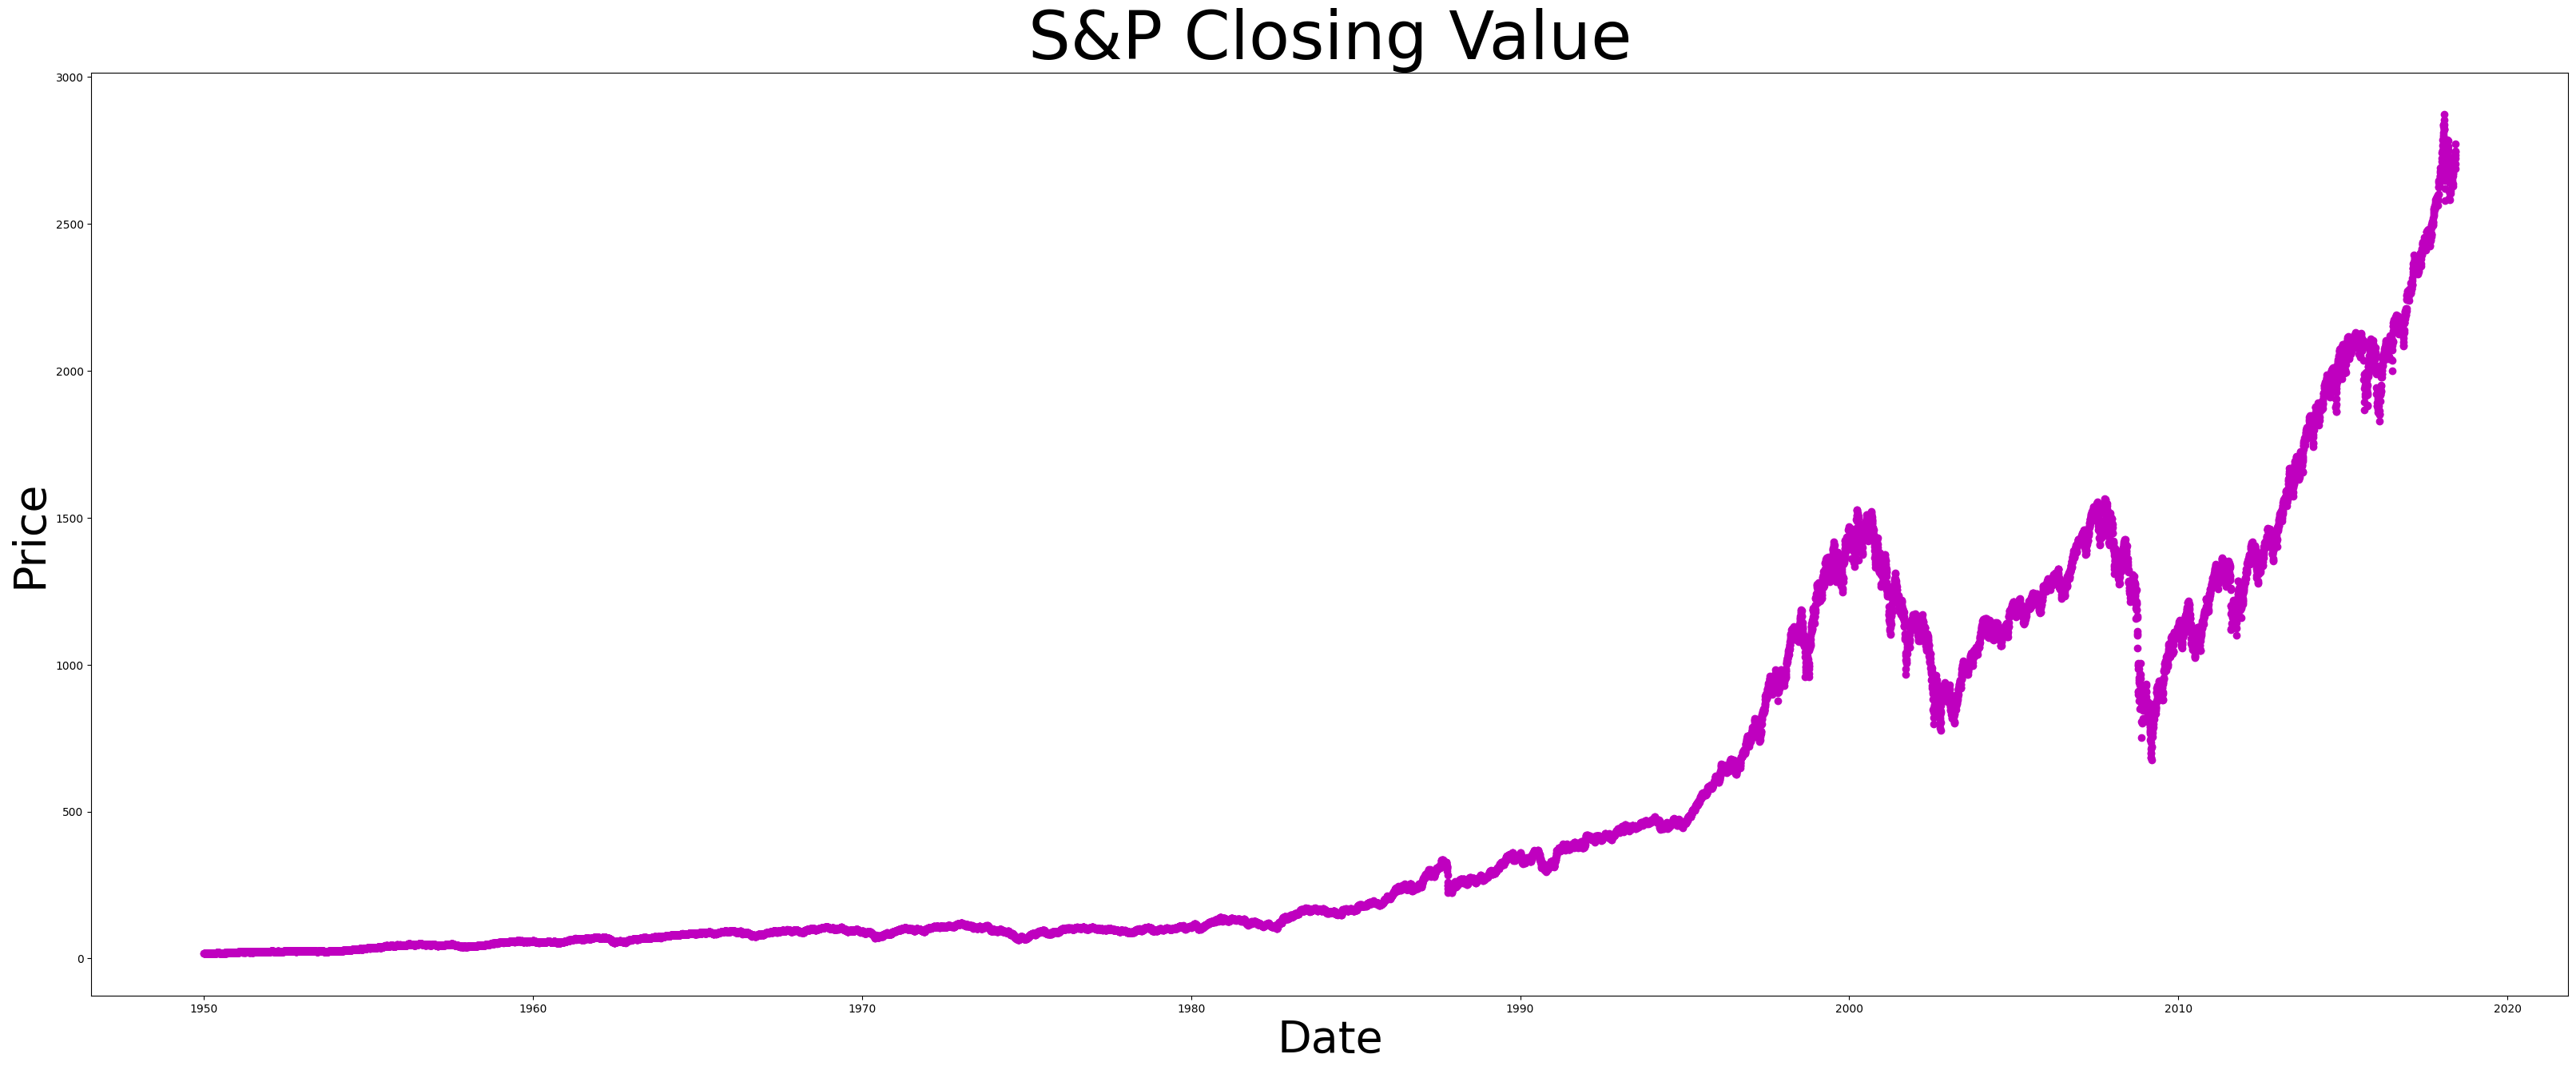

In [25]:
# plot closing values
# set size of figure
plt.figure(figsize=(40,15))
# create scatter plot
plt.scatter(data["Date"], data["Close"], c='m')
plt.title('S&P Closing Value', fontsize=60)
plt.xlabel('Date', fontsize=40)
plt.ylabel('Price', fontsize=40)

In [26]:
# Average price from the past 5 days.
data["5_day_avg"] = data["Close"].rolling(window=5).mean().shift(1)
# Average price from the past 30 days.
data["30_day_avg"] = data["Close"].rolling(window=30).mean().shift(1)
# Average price from the past 365 days.
data["year_avg"] = data["Close"].rolling(window=365).mean().shift(1)
# Ratio between the average price for the past 5 days, and the average price for the past 365 days
data["avg_ratio"] = data["5_day_avg"] / data["30_day_avg"]

In [27]:
# Standard deviation of the price over the past 5 days
data["5_day_std"] = data["Close"].rolling(window=5).std().shift(1)
# Standard deviation of the price over the past year
data["year_std"] = data["Close"].rolling(window=365).std().shift(1)
# Ratio between the std for the past 5 days, and the std for the past 365 days
data["std_ratio"] = data["5_day_std"] / data["year_std"]
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,5_day_avg,30_day_avg,year_avg,avg_ratio,5_day_std,year_std,std_ratio
0,1950-01-03,16.66,16.66,16.66,16.66,16.66,1260000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1950-01-04,16.85,16.85,16.85,16.85,16.85,1890000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1950-01-05,16.93,16.93,16.93,16.93,16.93,2550000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1950-01-06,16.98,16.98,16.98,16.98,16.98,2010000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1950-01-09,17.08,17.08,17.08,17.08,17.08,2520000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
# drops rows with missing values
data = data.dropna(axis=0)
# returns a series containing the count of NaN values for each column 
data.isnull().sum()

Date          0
Open          0
High          0
Low           0
Close         0
Adj Close     0
Volume        0
5_day_avg     0
30_day_avg    0
year_avg      0
avg_ratio     0
5_day_std     0
year_std      0
std_ratio     0
dtype: int64

In [29]:
# create training data (1951-2013)
train = data[data["Date"] < datetime(year=2013, month=1, day=1)]
train

,Date,Open,High,Low,Close,Adj Close,Volume,5_day_avg,30_day_avg,year_avg,avg_ratio,5_day_std,year_std,std_ratio
365,1951-06-19,22.020000,22.020000,22.020000,22.020000,22.020000,1100000,21.800000,21.703333,19.447726,1.004454,0.256223,1.790253,0.143121
366,1951-06-20,21.910000,21.910000,21.910000,21.910000,21.910000,1120000,21.900000,21.683000,19.462411,1.010008,0.213659,1.789307,0.119409
367,1951-06-21,21.780001,21.780001,21.780001,21.780001,21.780001,1100000,21.972000,21.659667,19.476274,1.014420,0.092574,1.788613,0.051758
368,1951-06-22,21.549999,21.549999,21.549999,21.549999,21.549999,1340000,21.960000,21.631000,19.489562,1.015210,0.115108,1.787659,0.064390
369,1951-06-25,21.290001,21.290001,21.290001,21.290001,21.290001,2440000,21.862000,21.599000,19.502082,1.012176,0.204132,1.786038,0.114293
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15846,2012-12-24,1430.150024,1430.150024,1424.660034,1426.660034,1426.660034,1248960000,1437.360010,1405.926001,1326.114028,1.022358,7.622009,89.830647,0.084849
15847,2012-12-26,1426.660034,1429.420044,1416.430054,1419.829956,1419.829956,2285030000,1436.620019,1407.486336,1326.412494,1.020699,8.589693,89.983530,0.095458
15848,2012-12-27,1419.829956,1422.800049,1401.800049,1418.099976,1418.099976,2830180000,1431.228003,1408.813000,1326.716494,1.015911,9.058684,90.111444,0.100528
15849,2012-12-28,1418.099976,1418.099976,1401.579956,1402.430054,1402.430054,2426680000,1427.685986,1410.265332,1326.995836,1.012353,10.208568,90.236516,0.113131


In [30]:
# create testing data 
test = data[data["Date"] > datetime(year=2013, month=1, day=1)]
test

,Date,Open,High,Low,Close,Adj Close,Volume,5_day_avg,30_day_avg,year_avg,avg_ratio,5_day_std,year_std,std_ratio
15851,2013-01-02,1426.189941,1462.430054,1426.189941,1462.420044,1462.420044,4202600000,1418.641992,1414.258667,1327.534055,1.003099,9.820801,90.463948,0.108560
15852,2013-01-03,1462.420044,1465.469971,1455.530029,1459.369995,1459.369995,3829730000,1425.793994,1417.676668,1327.908247,1.005726,22.261321,90.738976,0.245334
15853,2013-01-04,1459.369995,1467.939941,1458.989990,1466.469971,1466.469971,3424290000,1433.702002,1420.092668,1328.224877,1.009583,26.274326,90.995857,0.288742
15854,2013-01-07,1466.469971,1466.469971,1456.619995,1461.890015,1461.890015,3304970000,1443.376001,1422.714665,1328.557617,1.014522,27.945242,91.279049,0.306152
15855,2013-01-08,1461.890015,1461.890015,1451.640015,1457.150024,1457.150024,3601600000,1455.267993,1425.076664,1328.898603,1.021186,16.453319,91.544368,0.179731
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17213,2018-05-31,2720.979980,2722.500000,2700.679932,2705.270020,2705.270020,4235370000,2719.250049,2690.954972,2517.162137,1.010515,17.031538,158.703034,0.107317
17214,2018-06-01,2718.699951,2736.929932,2718.699951,2734.620117,2734.620117,3684130000,2713.646045,2690.842643,2518.376494,1.008474,15.823944,158.441028,0.099873
17215,2018-06-04,2741.669922,2749.159912,2740.540039,2746.870117,2746.870117,3376510000,2715.018066,2692.225651,2519.682110,1.008466,17.556226,158.253476,0.110937
17216,2018-06-05,2748.459961,2752.610107,2739.510010,2748.800049,2748.800049,3517790000,2720.126074,2694.783325,2521.009069,1.009404,22.787810,158.121873,0.144115


In [31]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       '5_day_avg', '30_day_avg', 'year_avg', 'avg_ratio', '5_day_std',
       'year_std', 'std_ratio'],
      dtype='object')

In [32]:
features = ["5_day_avg", "30_day_avg", "year_avg", "avg_ratio", "5_day_std", "year_std", "std_ratio"]

In [33]:
# output (closing value sets)
y_train = train["Close"]
y_test = test["Close"]
model = LinearRegression()
print(type(model))
model.fit(train[features], y_train)
predictions = model.predict(test[features])
mae = mean_absolute_error(test['Close'], predictions)
mae


<class 'sklearn.linear_model._base.LinearRegression'>


16.49004782004587

Text(0, 0.5, 'Stock Price')

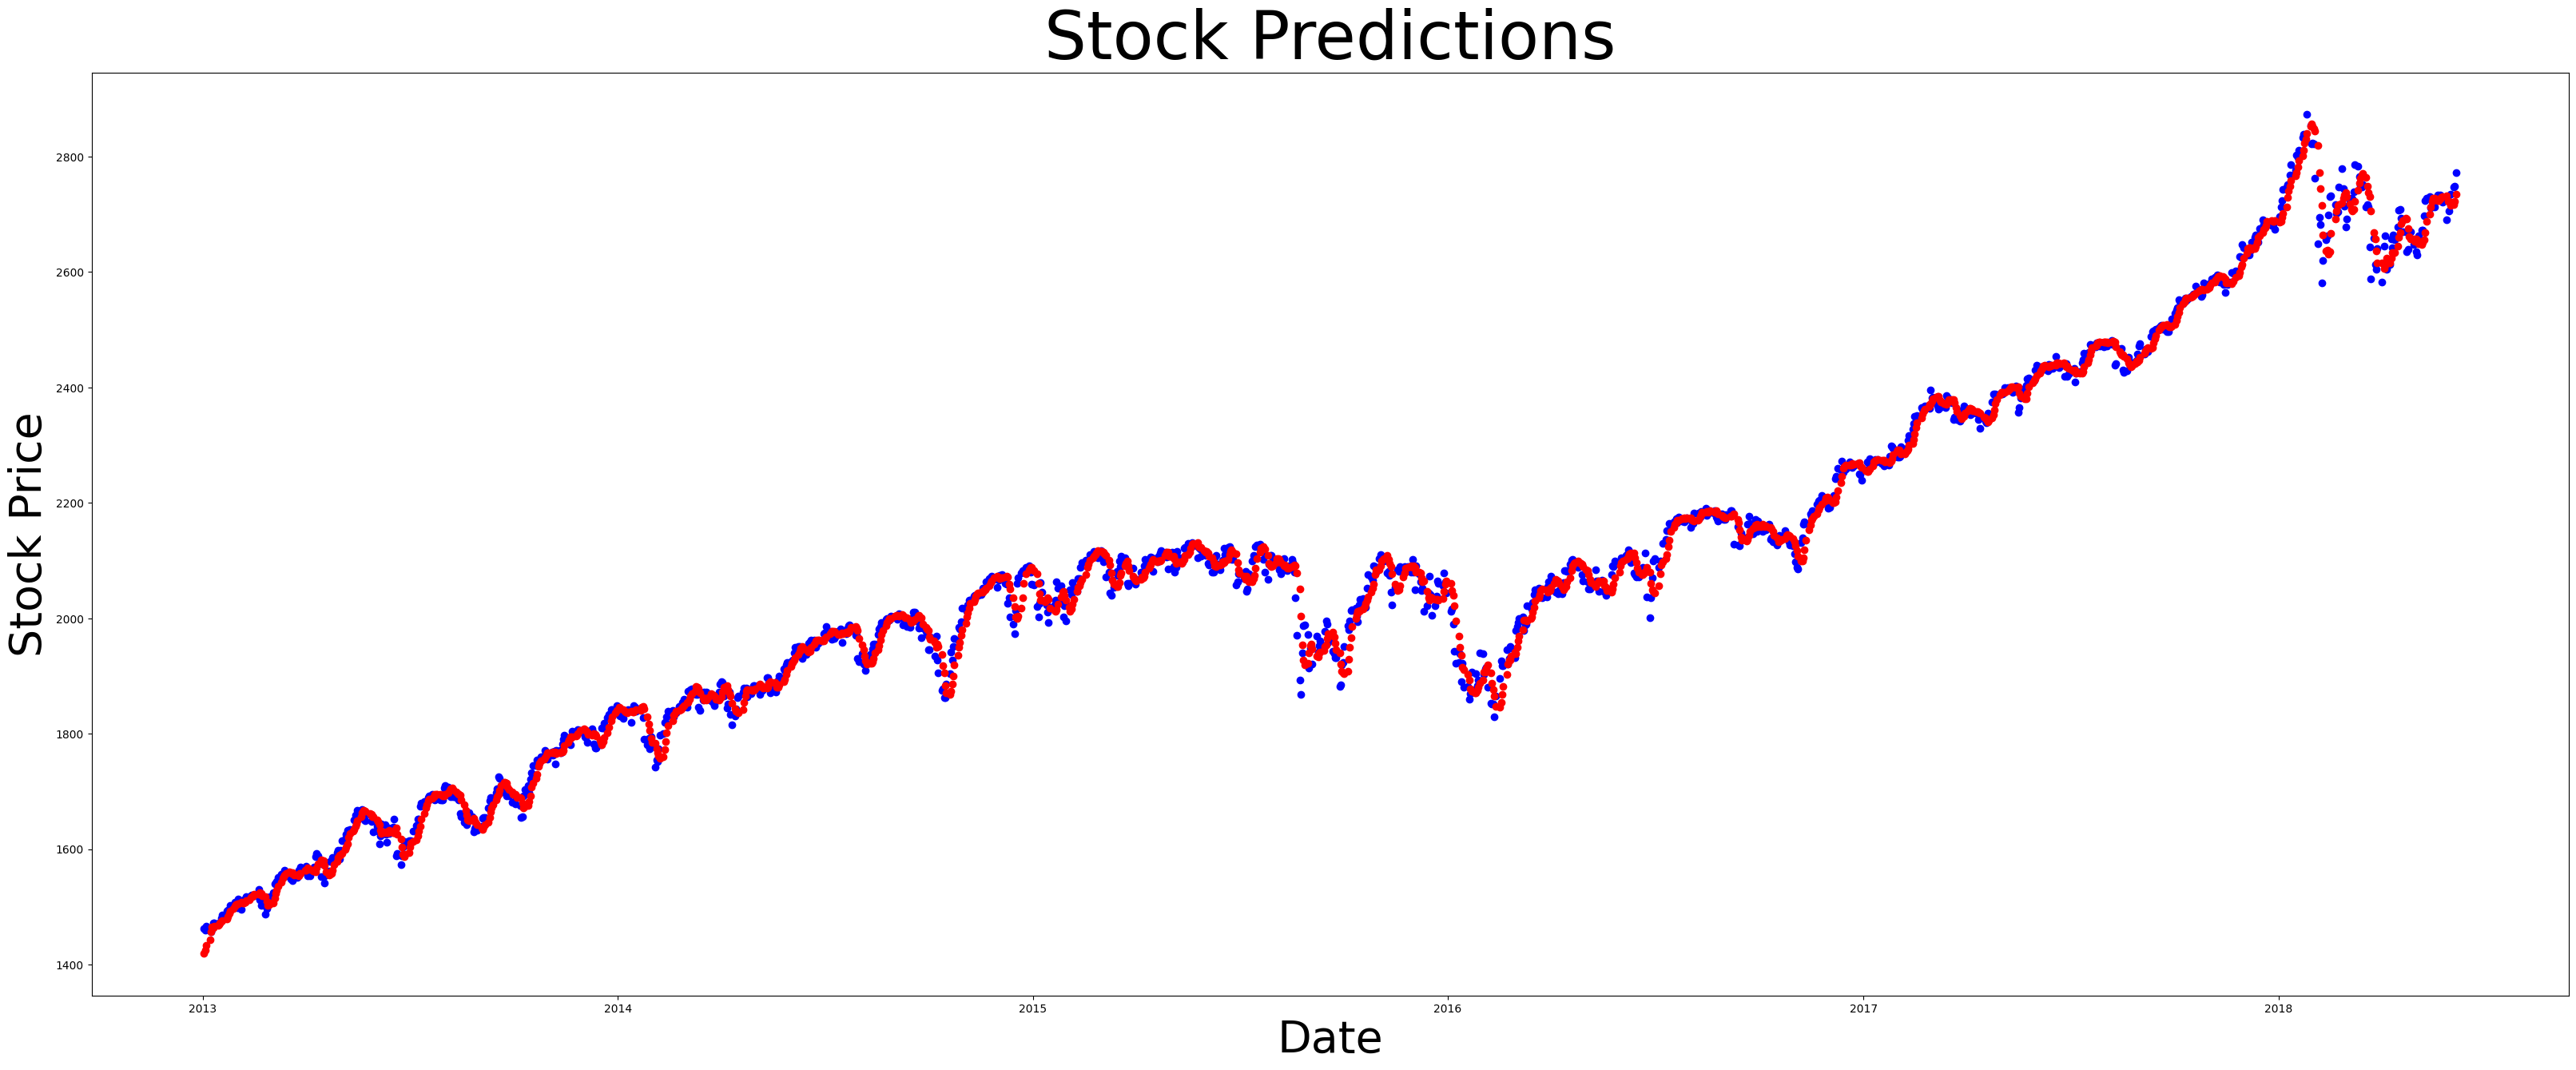

In [38]:
plt.figure(figsize=(40,15))
plt.scatter(test['Date'], test['Close'], c='b')
plt.scatter(test['Date'], predictions, c='r')
plt.title('Stock Predictions', fontsize=60)
plt.xlabel('Date', fontsize=40)
plt.ylabel('Stock Price', fontsize=40)
